In [1]:
LEX_REPS = ["bert", "pos", "emb-pos"]

In [2]:
TRANSITION_SYSTEMS = ["inorder", "topdown"]

In [3]:
BEAM_SIZE=10

In [4]:
SEEDS = 3

In [5]:
import load_corpora

In [6]:
from evaluate import evalb_from_files

In [7]:
from copy import copy

In [8]:
shift_reduce_models = []
for system in TRANSITION_SYSTEMS:
    for lex_rep in LEX_REPS:
        for seed in range(1, SEEDS+1):
            model_name = "{}-{}-seed={}-beam={}".format(system, lex_rep, seed, BEAM_SIZE)
            d = {
                'name': model_name,
                'parser': system,
                'seed': seed,
                'beam_size': BEAM_SIZE,
                'lex_rep': lex_rep,
            }
            shift_reduce_models.append(d)

In [118]:
chart_models = []
for system in ['chart']:
    for seed in range(1, 2):
        model_name = "{}-seed={}".format(system, seed)
        d = {
            'name': model_name,
            'parser': system,
            'seed': seed,
            'lex_rep': 'bert',
        }
        chart_models.append(d)

In [9]:
def get_predicted_file(corpus_name, model_name):
    return '../decodes/{}-{}_pred-tag-replaced.test.txt'.format(corpus_name, model_name)

In [11]:
decode_stats = []
for corpus_name, gold_file in load_corpora.CORPORA_FILES.items():
    if corpus_name == ['wsj_train']:
        continue
    for model in shift_reduce_models:
        print()
        print("{}: {}".format(corpus_name, model['name']))
        data = copy(model)
        normed_corpus_name = load_corpora.DECODE_NAME_NORM[corpus_name]
        pred_file = get_predicted_file(normed_corpus_name, model['name'])
        fscore, invalid_counts, read_and_valid = evalb_from_files(
            pred_file, gold_file
        )
        data['recall'] = fscore.recall
        data['precision'] = fscore.precision
        data['fscore'] = fscore.fscore
        data['complete_match'] = fscore.complete_match
        data['tagging_accuracy'] = fscore.tagging_accuracy
        data['error_count'] = invalid_counts.error_sentence_count
        data['skip_count'] = invalid_counts.skip_sentence_count
        
        data['corpus_name'] = corpus_name
        data['gold_file'] = gold_file
        data['pred_file'] = pred_file
        decode_stats.append(data)


brown_cf: inorder-bert-seed=1-beam=10

brown_cf: inorder-bert-seed=2-beam=10

brown_cf: inorder-bert-seed=3-beam=10

brown_cf: inorder-pos-seed=1-beam=10

brown_cf: inorder-pos-seed=2-beam=10

brown_cf: inorder-pos-seed=3-beam=10

brown_cf: inorder-emb-pos-seed=1-beam=10

brown_cf: inorder-emb-pos-seed=2-beam=10

brown_cf: inorder-emb-pos-seed=3-beam=10

brown_cf: topdown-bert-seed=1-beam=10

brown_cf: topdown-bert-seed=2-beam=10

brown_cf: topdown-bert-seed=3-beam=10

brown_cf: topdown-pos-seed=1-beam=10

brown_cf: topdown-pos-seed=2-beam=10

brown_cf: topdown-pos-seed=3-beam=10

brown_cf: topdown-emb-pos-seed=1-beam=10

brown_cf: topdown-emb-pos-seed=2-beam=10

brown_cf: topdown-emb-pos-seed=3-beam=10

brown_cg: inorder-bert-seed=1-beam=10

brown_cg: inorder-bert-seed=2-beam=10

brown_cg: inorder-bert-seed=3-beam=10

brown_cg: inorder-pos-seed=1-beam=10

brown_cg: inorder-pos-seed=2-beam=10

brown_cg: inorder-pos-seed=3-beam=10

brown_cg: inorder-emb-pos-seed=1-beam=10

brown_cg: in


wsj_dev: inorder-bert-seed=2-beam=10

wsj_dev: inorder-bert-seed=3-beam=10

wsj_dev: inorder-pos-seed=1-beam=10

wsj_dev: inorder-pos-seed=2-beam=10

wsj_dev: inorder-pos-seed=3-beam=10

wsj_dev: inorder-emb-pos-seed=1-beam=10

wsj_dev: inorder-emb-pos-seed=2-beam=10

wsj_dev: inorder-emb-pos-seed=3-beam=10

wsj_dev: topdown-bert-seed=1-beam=10

wsj_dev: topdown-bert-seed=2-beam=10

wsj_dev: topdown-bert-seed=3-beam=10

wsj_dev: topdown-pos-seed=1-beam=10

wsj_dev: topdown-pos-seed=2-beam=10

wsj_dev: topdown-pos-seed=3-beam=10

wsj_dev: topdown-emb-pos-seed=1-beam=10

wsj_dev: topdown-emb-pos-seed=2-beam=10

wsj_dev: topdown-emb-pos-seed=3-beam=10

wsj_test: inorder-bert-seed=1-beam=10

wsj_test: inorder-bert-seed=2-beam=10

wsj_test: inorder-bert-seed=3-beam=10

wsj_test: inorder-pos-seed=1-beam=10

wsj_test: inorder-pos-seed=2-beam=10

wsj_test: inorder-pos-seed=3-beam=10

wsj_test: inorder-emb-pos-seed=1-beam=10

wsj_test: inorder-emb-pos-seed=2-beam=10

wsj_test: inorder-emb-pos-

4 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.dev.gold.stripped
Predicted path: ../decodes/ewt-email.dev-inorder-bert-seed=2-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-ms55f7jl/output.txt

ewt_email_dev: inorder-bert-seed=3-beam=10
4 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.dev.gold.stripped
Predicted path: ../decodes/ewt-email.dev-inorder-bert-seed=3-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-xnkh9bj3/output.txt

ewt_email_dev: inorder-pos-seed=1-beam=10
4 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.dev.gold.stripped
Predicted path: ../decodes/ewt-email.dev-inorder-pos-seed=1-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-klz6stld/output.txt

ewt_email_dev: inorder-pos-seed=2-beam=10
4 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.dev.gold.stripped
Predicted path: ../

8 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.test.gold.stripped
Predicted path: ../decodes/ewt-email.test-topdown-bert-seed=3-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-msm9cfc0/output.txt

ewt_email_test: topdown-pos-seed=1-beam=10
8 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.test.gold.stripped
Predicted path: ../decodes/ewt-email.test-topdown-pos-seed=1-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-cm6bych4/output.txt

ewt_email_test: topdown-pos-seed=2-beam=10
8 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.test.gold.stripped
Predicted path: ../decodes/ewt-email.test-topdown-pos-seed=2-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-shuxm6sx/output.txt

ewt_email_test: topdown-pos-seed=3-beam=10
8 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.test.gold.stripped
Predicted p

In [119]:
for corpus_name, gold_file in load_corpora.CORPORA_FILES.items():
    if corpus_name == ['wsj_train']:
        continue
    for model in chart_models:
        print()
        print("{}: {}".format(corpus_name, model['name']))
        data = copy(model)
        normed_corpus_name = load_corpora.DECODE_NAME_NORM[corpus_name]
        pred_file = get_predicted_file(normed_corpus_name, model['name'])
        fscore, invalid_counts, read_and_valid = evalb_from_files(
            pred_file, gold_file
        )
        data['recall'] = fscore.recall
        data['precision'] = fscore.precision
        data['fscore'] = fscore.fscore
        data['complete_match'] = fscore.complete_match
        data['tagging_accuracy'] = fscore.tagging_accuracy
        data['error_count'] = invalid_counts.error_sentence_count
        data['skip_count'] = invalid_counts.skip_sentence_count
        
        data['corpus_name'] = corpus_name
        data['gold_file'] = gold_file
        data['pred_file'] = pred_file
        decode_stats.append(data)


brown_cf: chart-seed=1

brown_cg: chart-seed=1

brown_ck: chart-seed=1

brown_cl: chart-seed=1

brown_cm: chart-seed=1

brown_cn: chart-seed=1

brown_cp: chart-seed=1

brown_cr: chart-seed=1

brown_train: chart-seed=1
14818 : Number of lines unmatch (too many lines in gold file)

genia_train: chart-seed=1
Can't open test file (../decodes/genia-train-chart-seed=1_pred-tag-replaced.test.txt)
None Error sentences
None Skip sentences
Error reading EVALB results.
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/genia/train.gold.stripped
Predicted path: ../decodes/genia-train-chart-seed=1_pred-tag-replaced.test.txt
Output path: /tmp/evalb-fdtrkmae/output.txt

genia_dev: chart-seed=1
Can't open test file (../decodes/genia-dev-chart-seed=1_pred-tag-replaced.test.txt)
None Error sentences
None Skip sentences
Error reading EVALB results.
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/genia/dev.gold.stripped
Predicted path: ../decodes/genia-dev-chart-seed=1_pred-tag

In [13]:
import pandas

In [14]:
charniak_decode_stats = [
    {
        'fscore': fscore,
        'corpus_name': corpus,
        'parser': 'charniak',
        'seed': 1,
        'lex_rep': 'words'
    }
    for (corpus, fscore) in [
        # Table 5 of http://www.aclweb.org/anthology/D12-1096
        ('wsj_test', 92.07),
        ('brown_cf', 85.91),
        ('brown_cg', 84.56),
        ('brown_ck', 84.09),
        ('brown_cl', 83.95),
        ('brown_cm', 84.65),
        ('brown_cn', 85.20),
        ('brown_cp', 84.09),
        ('brown_cr', 83.60),
        ('ewt_weblog_dev', 84.15),
        ('ewt_weblog_email', 81.18),
    ]
]

In [15]:
sancl_best_decode_stats = [
    {
        'fscore': fscore,
        'corpus_name': corpus,
        'parser': 'sancl_best',
        'seed': 1,
        'lex_rep': 'words',
    }
    for (corpus, fscore) in [
        ('ewt_answers_test', 82.19),
        ('ewt_newsgroup_test', 84.33),
        ('ewt_reviews_test', 84.03),
        ('wsj_test', 90.53),
    ]
]

In [16]:
sancl_berkeley_decode_stats = [
    {
        'fscore': fscore,
        'corpus_name': corpus,
        'parser': 'berkeley',
        'seed': 1,
        'lex_rep': 'words',
    }
    for (corpus, fscore) in [
        ('ewt_answers_test', 75.92),
        ('ewt_newsgroup_test', 78.14),
        ('ewt_reviews_test', 77.16),
        ('wsj_test', 88.21),
    ]
]

In [120]:
decodes = pandas.DataFrame(decode_stats + charniak_decode_stats + sancl_best_decode_stats + sancl_berkeley_decode_stats)

In [122]:
decodes[decodes.parser=='chart']

,beam_size,complete_match,corpus_name,error_count,fscore,gold_file,lex_rep,name,parser,precision,pred_file,recall,seed,skip_count,tagging_accuracy
432,NaN,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-cf-chart-seed=emb-pos_pred-ta...,NaN,1,NaN,100.0
433,NaN,NaN,brown_cg,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-cg-chart-seed=emb-pos_pred-ta...,NaN,1,NaN,100.0
434,NaN,NaN,brown_ck,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-ck-chart-seed=emb-pos_pred-ta...,NaN,1,NaN,100.0
435,NaN,NaN,brown_cl,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-cl-chart-seed=emb-pos_pred-ta...,NaN,1,NaN,100.0
436,NaN,NaN,brown_cm,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-cm-chart-seed=emb-pos_pred-ta...,NaN,1,NaN,100.0
437,NaN,NaN,brown_cn,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-cn-chart-seed=emb-pos_pred-ta...,NaN,1,NaN,100.0
438,NaN,NaN,brown_cp,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-cp-chart-seed=emb-pos_pred-ta...,NaN,1,NaN,100.0
439,NaN,NaN,brown_cr,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-cr-chart-seed=emb-pos_pred-ta...,NaN,1,NaN,100.0
440,NaN,NaN,brown_train,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/brown-train-chart-seed=emb-pos_pred...,NaN,1,NaN,100.0
441,NaN,NaN,genia_train,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,chart-seed=emb-pos,chart,NaN,../decodes/genia-train-chart-seed=emb-pos_pred...,NaN,1,NaN,100.0


In [123]:
decodes[decodes.fscore.isnull()][['corpus_name', 'lex_rep', 'parser', 'seed']]

,corpus_name,lex_rep,parser,seed
198,wsj_train,bert,inorder,1
199,wsj_train,bert,inorder,2
200,wsj_train,bert,inorder,3
201,wsj_train,pos,inorder,1
202,wsj_train,pos,inorder,2
203,wsj_train,pos,inorder,3
204,wsj_train,emb-pos,inorder,1
205,wsj_train,emb-pos,inorder,2
206,wsj_train,emb-pos,inorder,3
207,wsj_train,bert,topdown,1


In [124]:
from corpora_stats import histogram_intersection, counts_intersection_rescale, counts_intersection_norescale

In [22]:
counts_intersection_rescale

,length,length_hist_intersection,multi_word_productions,multi_word_span_labels,name,productions,word_vocab
0,23.790917,0.998895,0.896158,0.945405,brown_cf,0.894847,0.631512
1,23.832279,0.999749,0.881926,0.947497,brown_cg,0.879872,0.612790
2,23.760533,0.998067,0.851284,0.897811,brown_ck,0.835191,0.546574
3,23.716221,0.997213,0.824564,0.870677,brown_cl,0.808332,0.534609
4,23.256710,0.982075,0.830465,0.887406,brown_cm,0.819607,0.518135
5,23.686809,0.996309,0.850399,0.897982,brown_cn,0.832343,0.535815
6,23.799643,0.999172,0.827014,0.865893,brown_cp,0.804463,0.539221
7,23.751988,0.997891,0.861717,0.905939,brown_cr,0.843040,0.554399
8,23.841745,0.999900,0.877093,0.911495,brown_train,0.860632,0.620754
9,23.846316,0.998770,0.790909,0.878673,genia_train,0.797020,0.397509


In [23]:
SANCL_CORPORA = ['ewt_answers_test', 'ewt_newsgroup_test', 'ewt_reviews_test', 'wsj_test']

In [24]:
from load_corpora import CORPORA_FILES

In [25]:
JONO_CORPORA = ['wsj_test'] + [corpus for corpus in CORPORA_FILES if corpus.startswith("brown")]

In [26]:
# TODO: merge to corpora_stats
CORPUS_STAT_COLS = ['word_vocab', 'productions', 'multi_word_productions', 'multi_word_span_labels', 'length_hist_intersection']

In [27]:
EVALB_COLS = ['fscore', 'complete_match', 'tagging_accuracy', 'skip_count']

In [28]:
RESCALE = False

In [29]:
counts_intersection_norescale['word_vocab'].corr(counts_intersection_norescale['productions'], method='spearman')

0.906086956521739

In [30]:
counts_intersection_norescale['word_vocab'].corr(counts_intersection_norescale['multi_word_productions'], method='spearman')

0.9565217391304346

In [31]:
counts_intersection_norescale['word_vocab'].corr(counts_intersection_norescale['multi_word_span_labels'], method='spearman')

0.8426086956521738

In [32]:
counts_intersection_norescale['word_vocab'].corr(counts_intersection_norescale['length_hist_intersection'], method='spearman')

0.6017391304347826

In [125]:
decodes_merged = decodes.merge(counts_intersection_rescale if RESCALE else counts_intersection_norescale , left_on='corpus_name', right_on='name')

In [126]:
grouped_decodes = decodes_merged.groupby(['corpus_name', 'lex_rep', 'parser'])[EVALB_COLS + CORPUS_STAT_COLS].mean()

In [127]:
grouped_decodes[-grouped_decodes['fscore'].isnull()]

fscore  complete_match  \
corpus_name     lex_rep parser                                  
brown_cf        bert    chart       94.070000       47.310000   
                        inorder     94.370000       50.716667   
                        topdown     94.383333       50.103333   
                emb-pos inorder     87.790000       35.336667   
                        topdown     87.360000       34.680000   
                pos     inorder     86.713333       32.103333   
                        topdown     86.203333       31.216667   
                words   charniak    85.910000             NaN   
brown_cg        bert    chart       93.200000       41.660000   
                        inorder     93.480000       43.426667   
                        topdown     93.403333       43.233333   
                emb-pos inorder     86.796667       31.430000   
                        topdown     86.116667       31.136667   
                pos     inorder     85.676667       29.346667   
                        topdown     84.813333       29.003333   
                words   charniak    84.560000             NaN   
brown_ck        bert    chart       92.900000       51.690000   
                        inorder     93.200000       53.330000   
                        topdown     93.106667       53.406667   
                emb-pos inorder     86.226667       41.560000   
                        topdown     85.566667       41.046667   
                pos     inorder     85.016667       39.473333   
                        topdown     84.456667       38.560000   
                words   charniak    84.090000             NaN   
brown_cl        bert    chart       92.330000       50.380000   
                        inorder     92.700000       52.640000   
                        topdown     92.650000       52.890000   
                emb-pos inorder     86.186667       39.823333   
                        topdown     85.580000       39.830000   
                pos     inorder     84.990000       38.286667   
...                                       ...             ...   
ewt_weblog_test emb-pos topdown     82.610000       29.783333   
                pos     inorder     81.513333       27.910000   
                        topdown     80.886667       27.680000   
genia_dev       bert    inorder     86.636667       12.076667   
                        topdown     86.563333       11.803333   
                emb-pos inorder     80.423333        9.383333   
                        topdown     80.270000        9.526667   
                pos     inorder     79.016667        8.866667   
                        topdown     78.323333        8.180000   
genia_train     bert    inorder     87.986667       19.336667   
                        topdown     87.863333       18.683333   
                emb-pos inorder     81.870000       14.040000   
                        topdown     81.543333       13.620000   
                pos     inorder     80.603333       12.670000   
                        topdown     79.706667       12.150000   
wsj_dev         bert    inorder     95.656667       55.470000   
                        topdown     95.573333       55.590000   
                emb-pos inorder     92.470000       47.566667   
                        topdown     92.260000       46.646667   
                pos     inorder     91.616667       44.506667   
                        topdown     91.326667       43.763333   
wsj_test        bert    inorder     95.680000       56.746667   
                        topdown     95.670000       56.743333   
                emb-pos inorder     92.096667       45.253333   
                        topdown     91.910000       44.976667   
                pos     inorder     91.433333       43.653333   
                        topdown     90.823333       41.806667   
                words   berkeley    88.210000             NaN   
                        charniak    92.070000             NaN   
         

In [128]:
import matplotlib.pyplot as plt

In [129]:
def label_scatter(df, x_label='word_vocab', y_label='fscore', ax=None, color='b', **kwargs):
    if ax is None:
        fig, ax = plt.subplots(figsize=(16,9))
    df.plot.scatter(x_label, y_label, ax=ax, c=color, **kwargs)
    for k, v in df.reset_index().iterrows():
        ax.annotate(v['corpus_name'], (v[x_label], v[y_label]))
    return ax

In [130]:
import numpy as np

In [131]:
def plot(grouped_decodes, x_label='word_vocab', y_label='fscore', parser_type_pred=lambda p: p == 'inorder', best_fit=False, corpora_filter=None):
    grouped_decodes = grouped_decodes[~grouped_decodes[y_label].isnull()]
    if corpora_filter is not None:
        grouped_decodes = grouped_decodes[grouped_decodes.index.get_level_values('corpus_name').isin(corpora_filter)]
    colors = ['r', 'g', 'b', 'y']
    ix = 0
    ax = None
    has_corpora = None
    for key, group in grouped_decodes.groupby(['lex_rep', 'parser']):
        color = colors[min(ix, len(colors) - 1)]
        if not parser_type_pred(key[1]):
            continue
        if has_corpora is None:
            has_corpora = set(group.index.get_level_values('corpus_name'))
        else:
            has_corpora = has_corpora & set(group.index.get_level_values('corpus_name'))
            
    group_sizes = []
    for key, group in grouped_decodes.groupby(['lex_rep', 'parser']):
        if not parser_type_pred(key[1]):
            continue
        group = group[group.index.get_level_values('corpus_name').isin(has_corpora)]
        color = colors[min(ix, len(colors) - 1)]
        group_sizes.append(len(group))
        ax = label_scatter(group, x_label=x_label, y_label=y_label, color=color, ax=ax, label=' '.join(key))
        x = group[x_label]
        y = group[y_label]
        if best_fit:
            coeff = np.polyfit(x, y, 1)
            print("{} best fit: {}".format(key, coeff))
            ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color=color)
        ix += 1
    if group_sizes:
        assert all(x == group_sizes[0] for x in group_sizes[1:])
    print("group sizes: {}".format(group_sizes))

In [132]:
grouped_decodes.columns

Index(['fscore', 'complete_match', 'tagging_accuracy', 'skip_count',
       'word_vocab', 'productions', 'multi_word_productions',
       'multi_word_span_labels', 'length_hist_intersection'],
      dtype='object')

In [133]:
from IPython.display import set_matplotlib_formats

In [134]:
set_matplotlib_formats('png', 'pdf')

('bert', 'inorder') best fit: [22.69744659 78.89655404]
('emb-pos', 'inorder') best fit: [33.20488918 65.81747925]
('pos', 'inorder') best fit: [34.74604972 63.72060887]
group sizes: [23, 23, 23]


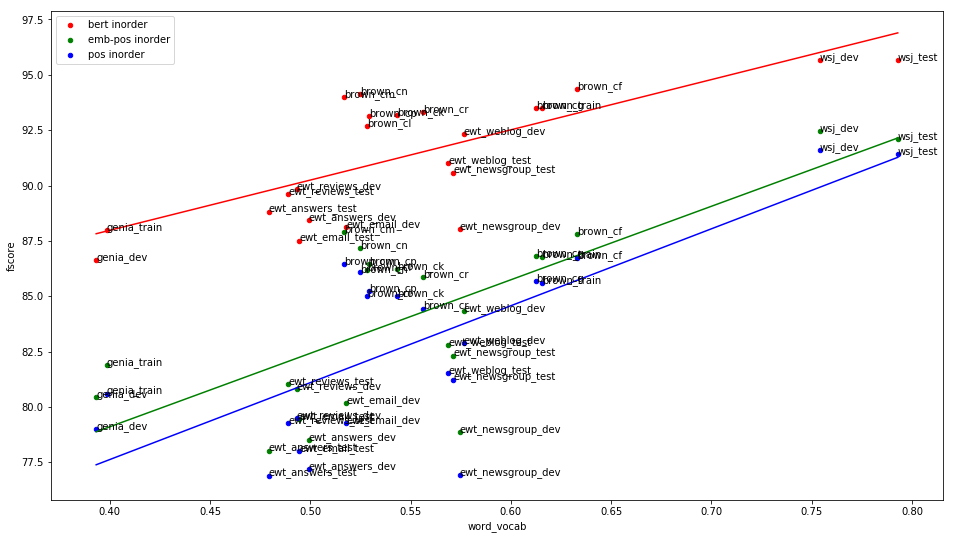

In [135]:
plot(grouped_decodes, best_fit=True, parser_type_pred=lambda p: p == 'inorder')

('bert', 'inorder') best fit: [21.07410996 78.87385246]
('emb-pos', 'inorder') best fit: [41.08165045 59.39630516]
('pos', 'inorder') best fit: [43.48086974 56.85144903]
('words', 'sancl_best') best fit: [24.30538191 71.09714657]
group sizes: [4, 4, 4, 4]


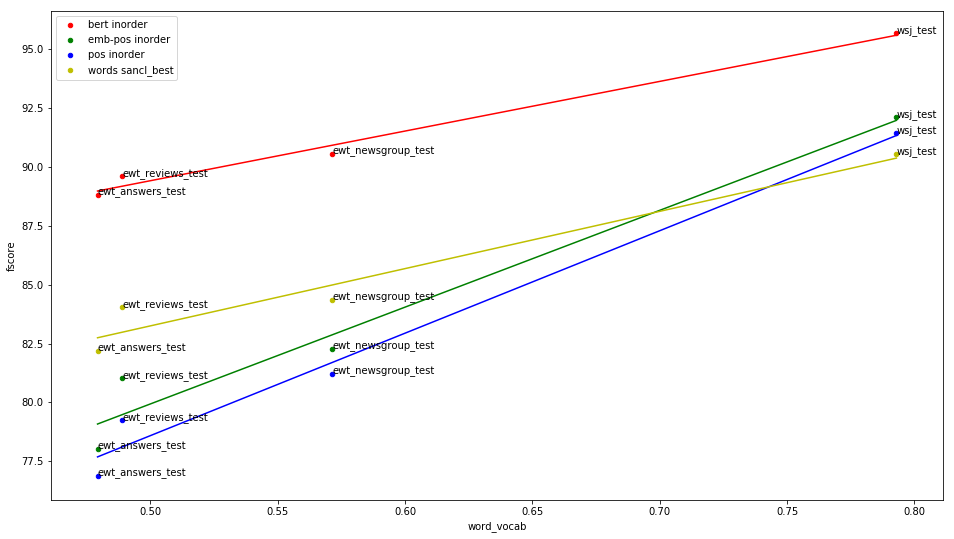

In [136]:
plot(grouped_decodes, best_fit=True, parser_type_pred=lambda p: p == 'inorder' or p == 'sancl_best')

('bert', 'inorder') best fit: [21.07410996 78.87385246]
('emb-pos', 'inorder') best fit: [41.08165045 59.39630516]
('pos', 'inorder') best fit: [43.48086974 56.85144903]
('words', 'berkeley') best fit: [38.16013656 57.60571955]
group sizes: [4, 4, 4, 4]


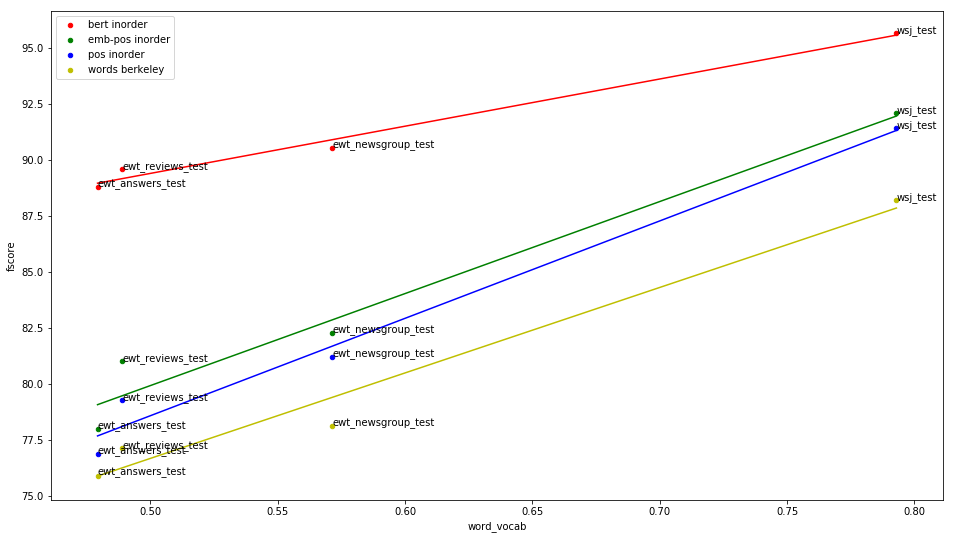

In [137]:
plot(grouped_decodes, best_fit=True, parser_type_pred=lambda p: p == 'inorder' or p == 'berkeley')

('bert', 'inorder') best fit: [ 8.24376615 88.83874566]
('emb-pos', 'inorder') best fit: [18.72002593 76.19894438]
('pos', 'inorder') best fit: [20.90724469 73.73971839]
('words', 'charniak') best fit: [27.06761096 69.49100065]
group sizes: [10, 10, 10, 10]


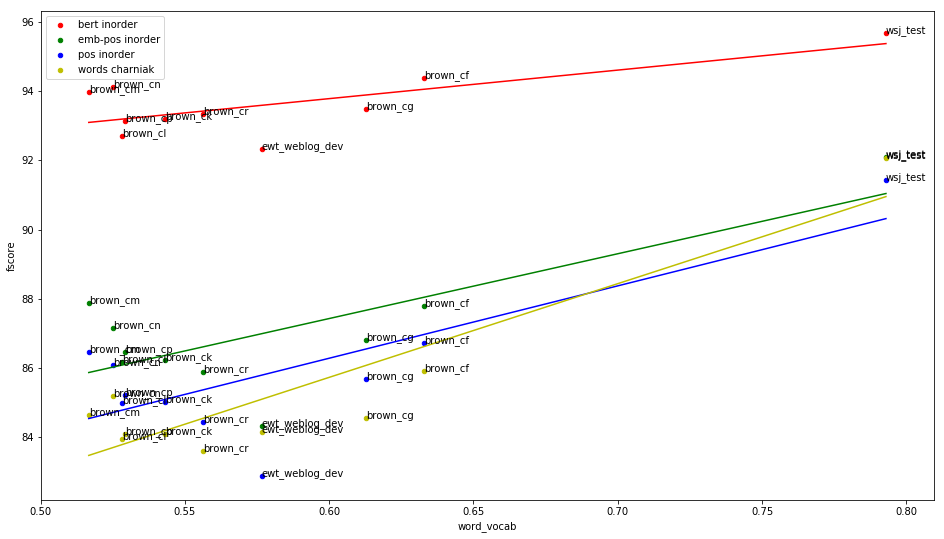

In [138]:
plot(grouped_decodes, best_fit=True, parser_type_pred=lambda p: p == 'inorder' or p == 'charniak')

('bert', 'chart') best fit: [ 5.77710836 89.92235457]
('bert', 'inorder') best fit: [ 3.80617694 91.39514348]
('bert', 'topdown') best fit: [ 5.05947964 90.61688613]
group sizes: [9, 9, 9]


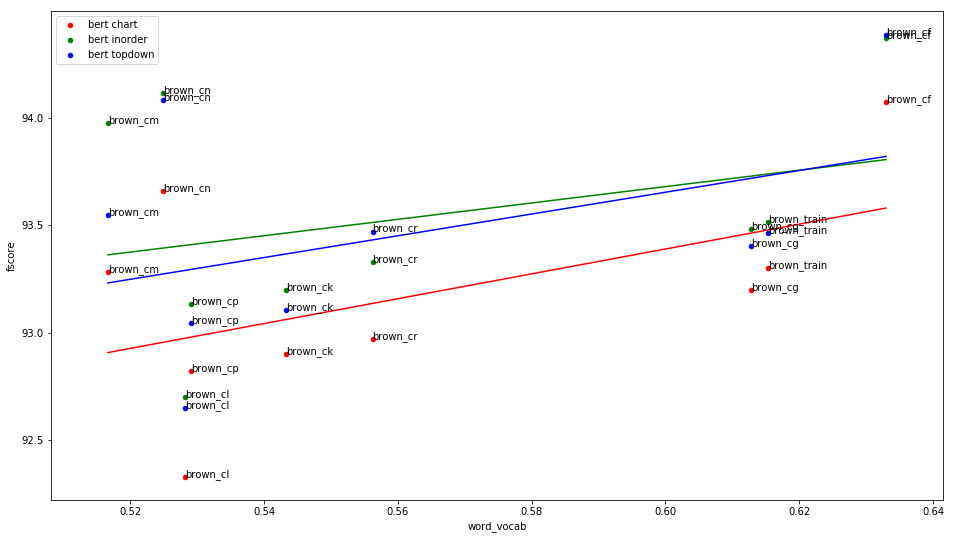

In [143]:
plot(grouped_decodes[grouped_decodes.index.get_level_values('lex_rep') == 'bert'], best_fit=True, parser_type_pred=lambda p: p == 'inorder' or p == 'chart' or p == 'topdown')

('bert', 'inorder') best fit: [69.18212817  6.86462175]
('bert', 'topdown') best fit: [73.66819082  3.4398821 ]
('pos', 'inorder') best fit: [56.90231831  0.68176763]
('pos', 'topdown') best fit: [54.77873309  1.20276211]
group sizes: [23, 23, 23, 23]


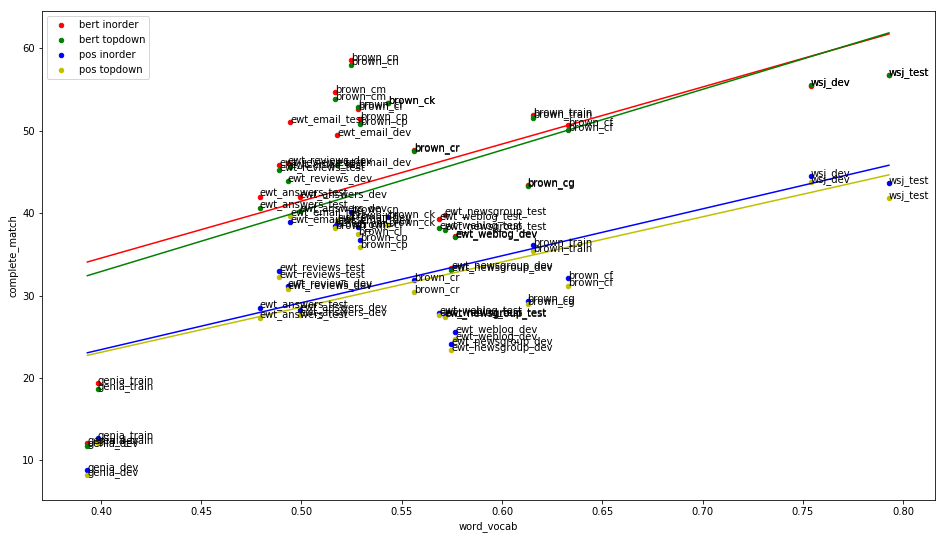

In [113]:
plot(grouped_decodes[grouped_decodes.index.get_level_values('lex_rep').isin(['pos', 'bert'])], y_label='complete_match', best_fit=True, parser_type_pred=lambda p: p == 'inorder' or p == 'topdown')

('bert', 'topdown') best fit: [23.12575677 78.57684076]
('emb-pos', 'topdown') best fit: [33.06922449 65.4923125 ]
('pos', 'topdown') best fit: [35.1423206  62.86665032]
group sizes: [23, 23, 23]


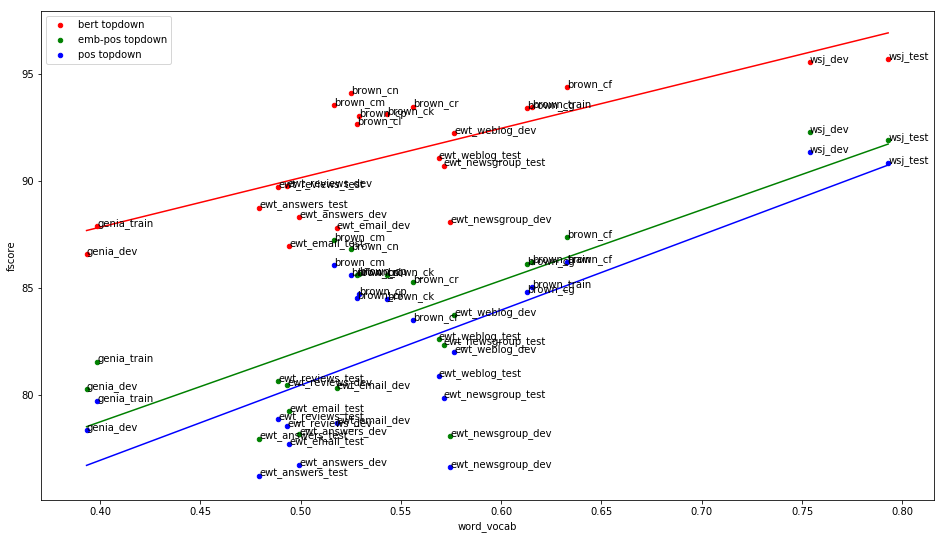

In [115]:
plot(grouped_decodes, y_label='fscore', best_fit=True, parser_type_pred=lambda p: p == 'topdown')

In [116]:
CORPUS_STAT_COLS

['word_vocab',
 'productions',
 'multi_word_productions',
 'multi_word_span_labels',
 'length_hist_intersection']

('bert', 'inorder') best fit: [ 2.88312923 89.39822677]
('emb-pos', 'inorder') best fit: [10.71289749 76.60526207]
('pos', 'inorder') best fit: [10.73533297 75.32984319]


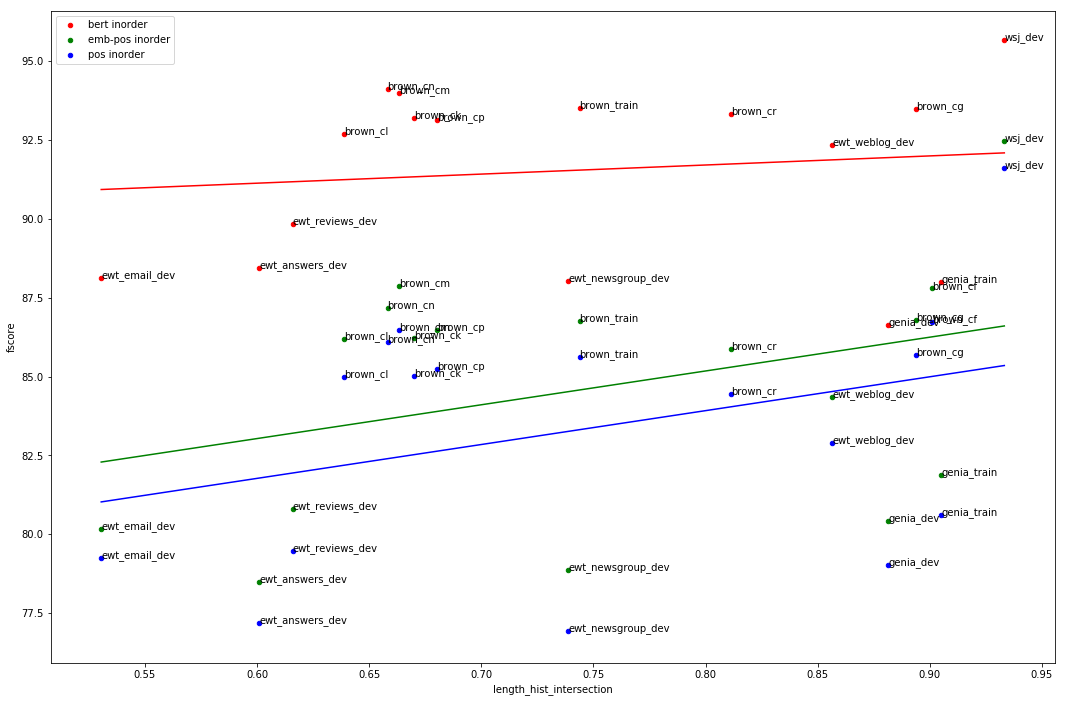

In [118]:
plot(grouped_decodes.dropna(), x_label='length_hist_intersection', best_fit=True, parser_type='inorder')

('bert', 'inorder') best fit: [28.79647941 68.06188552]
('emb-pos', 'inorder') best fit: [44.64649673 48.02723144]
('pos', 'inorder') best fit: [45.78938879 45.83179655]


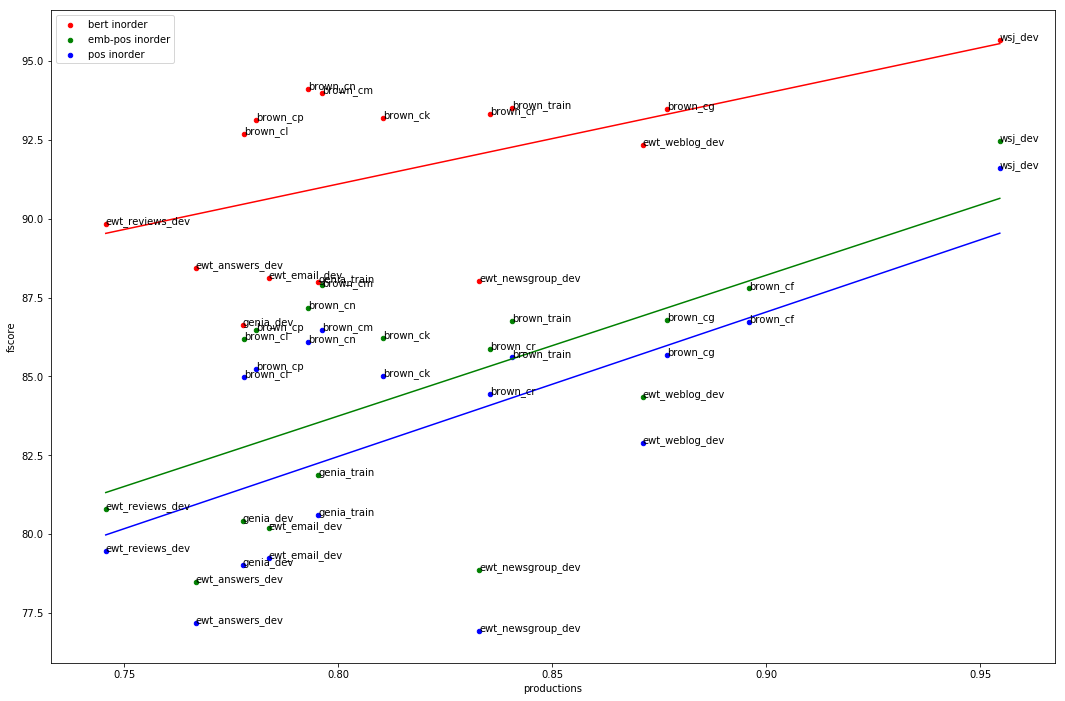

In [119]:
plot(grouped_decodes.dropna(), x_label='productions', best_fit=True, parser_type='inorder')

('bert', 'inorder') best fit: [ 7.77336087 44.01268752]
('emb-pos', 'inorder') best fit: [19.95375176 25.30564276]
('pos', 'inorder') best fit: [17.00269511 24.7276628 ]


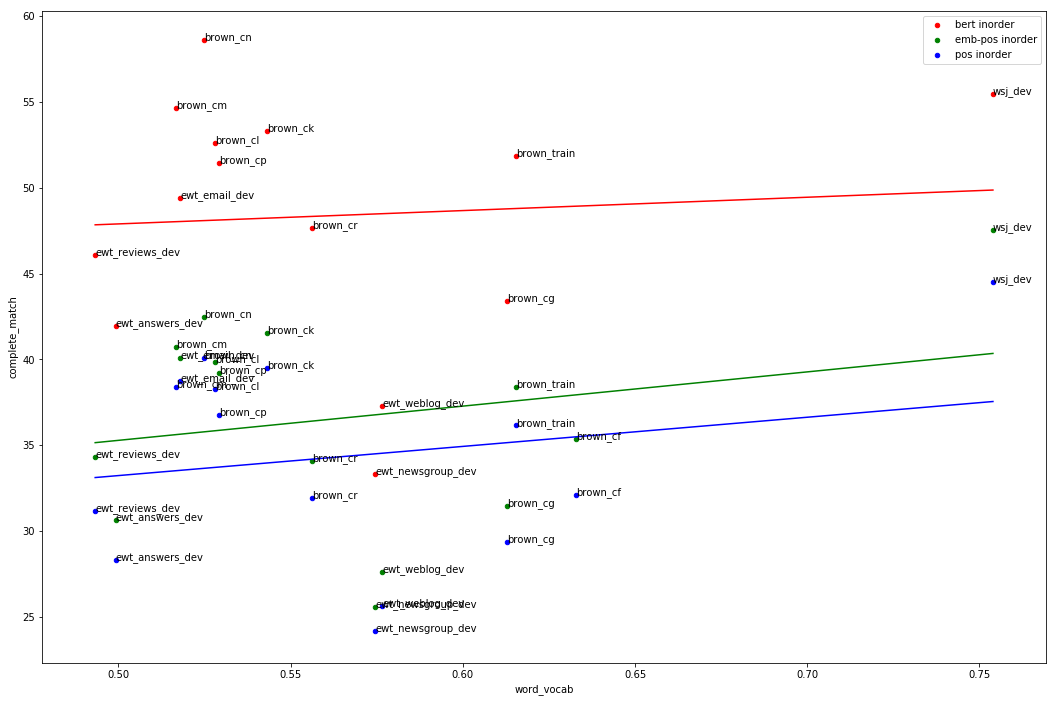

In [124]:
plot(grouped_decodes[~grouped_decodes.index.get_level_values('corpus_name').str.startswith("genia_")].dropna(), x_label='word_vocab', y_label='complete_match', best_fit=True, parser_type='inorder')

('bert', 'inorder') best fit: [92.68834898 -5.73106092]
('emb-pos', 'inorder') best fit: [75.99608381 -7.77166224]
('pos', 'inorder') best fit: [70.93642468 -7.10579101]


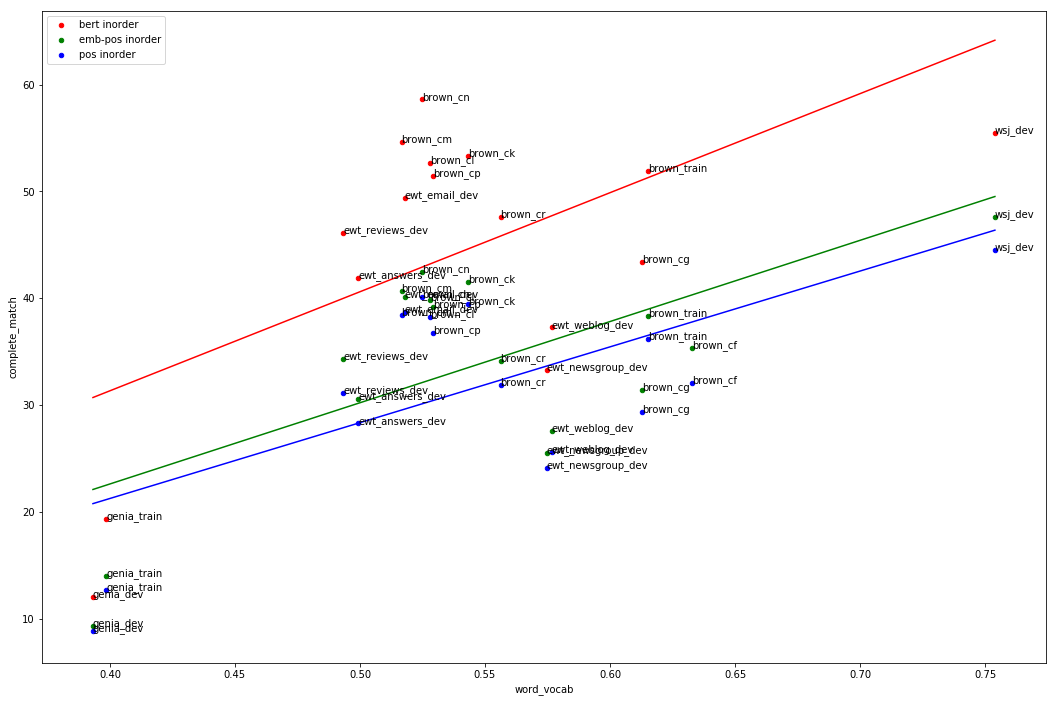

In [125]:
plot(grouped_decodes.dropna(), x_label='word_vocab', y_label='complete_match', best_fit=True, parser_type='inorder')